In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
customers_df = pd.read_csv("../Customers.csv")
transactions_df = pd.read_csv("../Transactions.csv")

In [58]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [59]:
customer_transaction_history = transactions_df.groupby('CustomerID').agg(
    transaction_count=('TransactionID', 'count'),
    total_spend=('TotalValue', 'sum'),
    avg_order_value=('TotalValue', 'mean'),
    avg_quantity=('Quantity', 'mean')
).reset_index()

In [60]:
customer_profile = customers_df.merge(customer_transaction_history, on='CustomerID', how='left')
customer_profile = customer_profile.dropna(subset=['transaction_count', 'total_spend', 'avg_order_value', 'avg_quantity'])

In [61]:
features = ['transaction_count', 'total_spend', 'avg_order_value', 'avg_quantity']
X = customer_profile[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

In [62]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(X_scaled)

In [49]:
db_index = davies_bouldin_score(X_scaled, customer_profile['Cluster'])
print(f"DB Index: {db_index:.4f}")

DB Index: 1.0535


In [63]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [64]:
customer_profile['PCA1'] = X_pca[:, 0]
customer_profile['PCA2'] = X_pca[:, 1]

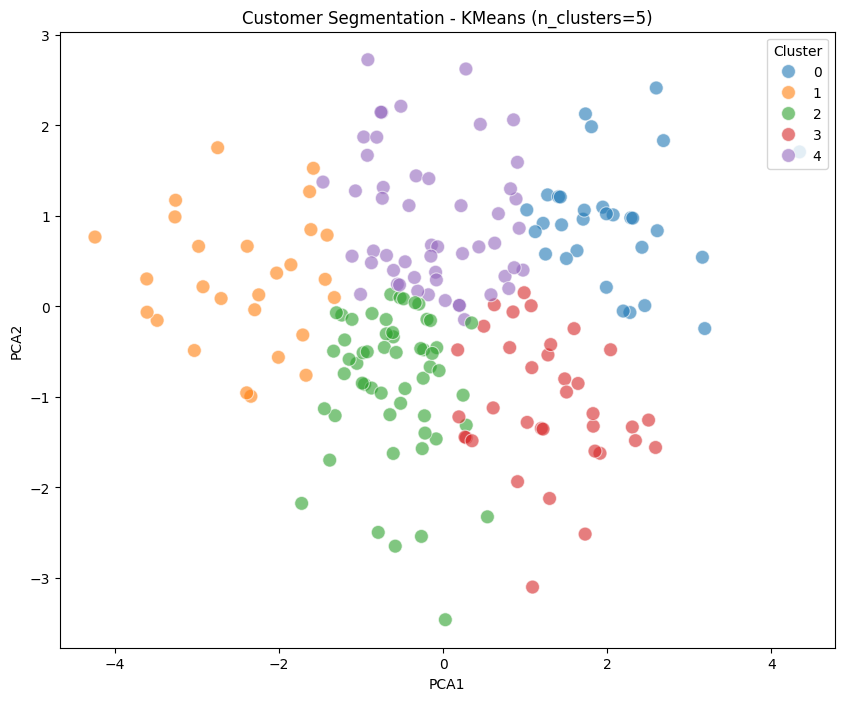

In [52]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=customer_profile, s=100, alpha=0.6)
plt.title(f'Customer Segmentation - KMeans (n_clusters={n_clusters})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [53]:
print("Cluster Centers (in original feature space):")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)


Cluster Centers (in original feature space):
   transaction_count  total_spend  avg_order_value  avg_quantity
0           8.133333  6409.223667       795.882680      2.787109
1           2.925926  1101.636667       373.592827      1.793827
2           3.454545  2211.271818       666.215106      2.766667
3           4.514286  4417.016857      1006.014771      3.014762
4           6.326923  3687.675385       596.396571      2.190354


In [54]:
customer_profile[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)
print("Customer Segmentation results saved to 'Customer_Segmentation.csv'.")

Customer Segmentation results saved to 'Customer_Segmentation.csv'.


In [55]:


# Display cluster centers (in original feature space)
print("Cluster Centers (in original feature space):")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)


cluster_counts = customer_profile['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

customer_profile[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)
print("Customer Segmentation results saved to 'Customer_Segmentation.csv'.")


Cluster Centers (in original feature space):
   transaction_count  total_spend  avg_order_value  avg_quantity
0           8.133333  6409.223667       795.882680      2.787109
1           2.925926  1101.636667       373.592827      1.793827
2           3.454545  2211.271818       666.215106      2.766667
3           4.514286  4417.016857      1006.014771      3.014762
4           6.326923  3687.675385       596.396571      2.190354

Number of customers in each cluster:
Cluster
0    30
1    27
2    55
3    35
4    52
Name: count, dtype: int64
Customer Segmentation results saved to 'Customer_Segmentation.csv'.
